In [4]:
import pandas as pd
from sodapy import Socrata


# Loading dataset and Using PANDAS Library

In [5]:
client = Socrata("opendata.usac.org", None)

In [6]:
results = client.get("qdmp-ygft", limit=995979)

In [129]:
results_df = pd.DataFrame.from_records(results)

## Filter The Datset Based on Form Version

In [130]:
results_dfC = results_df
results_df = results_df[results_df.form_version == 'Original']


## Filter The Datset Based on Window Status

In [131]:
results_df = results_df[results_df.is_certified_in_window == 'In Window']

## Showing Number of Funding Request for Each Year

In [132]:
df_2016 = results_df[results_df.funding_year == '2016']
df_2017 = results_df[results_df.funding_year == '2017']
df_2018 = results_df[results_df.funding_year == '2018']

# The whole datset for three years after filtering
frames = [df_2016, df_2017, df_2018]
df = pd.concat(frames)

In [133]:
## Two function defined to show the values on bar charts
def show_values_on_bars(axs, h_v="h", space=0.8):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                if p.get_height()>=0:
                    _x = p.get_x() + p.get_width() / 2 +0.03
                    _y = p.get_y() + p.get_height()+0.55
                    value = str(int(p.get_height()))
                    ax.text(_x, _y, value, ha="center", fontsize = 14)
                else:
                     _x = p.get_x() + p.get_width() / 2 +0.02
                     _y = p.get_y() + p.get_height()-4.8
                     value = str(int(p.get_height()))
                     ax.text(_x, _y, value, ha="center", fontsize = 14) 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()-0.15
                value = str(int(p.get_width()))
                ax.text(_x, _y, value, ha="left", fontsize = 14)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
        
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * 0.5)

### Preparing The Data for Three Years in terms of Funding Request count, and Funding Commitment Request.

In [134]:
# Counting number of each funding request for 2016,2017,2018 years

c2016 = df_2016['funding_request_number'].count()
c2017 = df_2017['funding_request_number'].count()
c2018 = df_2018['funding_request_number'].count()
c = [c2016, c2017, c2018]

# the whole amountof funding comitment rerquest for 2016,2017,2018 years

df2016 = pd.DataFrame(data=df_2016['funding_commitment_request'].index, columns=['funding_commitment_request'])
s2016 = df2016.sum()
df2017 = pd.DataFrame(data=df_2017['funding_commitment_request'].index, columns=['funding_commitment_request'])
s2017 = df2017.sum()
df2018 = pd.DataFrame(data=df_2018['funding_commitment_request'].index, columns=['funding_commitment_request'])
s2018 = df2018.sum()
s = [s2016[0], s2017[0], s2018[0]]

# Placing all information in one dictionary

num_reqst = pd.DataFrame({"Number of Funding Requests": [c[0], c[1], c[2]],
                    "Type": ['Funding Request Number', 'Funding Request Number', 'Funding Request Number'],
                  "Year": ['2016', '2017', '2018']})

num_comits = pd.DataFrame({"Funding  Commitment Requests": [s[0], s[1], s[2]],
                    "Typ": ['Funding Commitment Request', 'Funding Commitment Request', 'Funding Commitment Request'],
                  "Years": ['2016', '2017', '2018']})

## Changes in Three Years Based On Funding Request Number

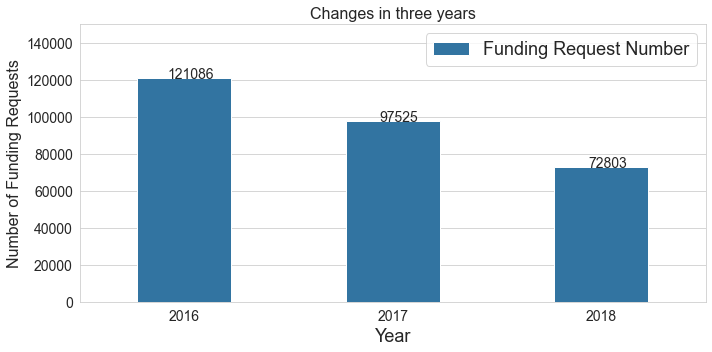

In [135]:
# visualizing the number of each funidng request
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
title = 'Changes in three years'
sns.set_style('whitegrid')


axes = sns.barplot(y='Number of Funding Requests', x='Year', data=num_reqst, hue = "Type")
show_values_on_bars(axes, "v", 0.5)
change_width(axes, .45)
axes.set_title(title, fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.set_xlabel('Year', fontsize = 18)
axes.set_ylabel('Number of Funding Requests', fontsize = 16)
plt.legend(loc='upper right', fontsize = 18)
plt.ylim(0, 150000)

plt.tight_layout()    
plt.savefig('test.jpg', dpi =1000)

## Changes in Three Years Based On Funding Commitment Request 

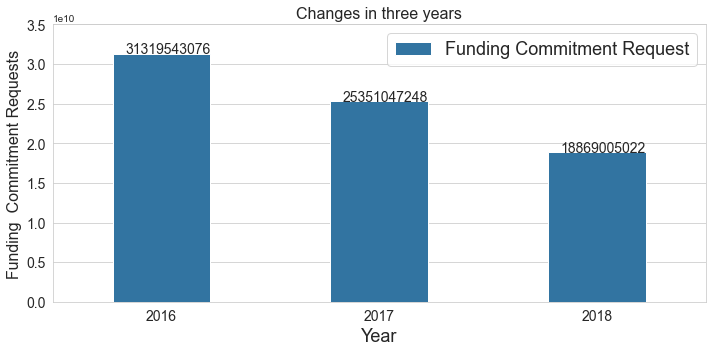

In [138]:
# visualizing the Funding Commitment Requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
title = 'Changes in three years'
sns.set_style('whitegrid')


axes = sns.barplot(y='Funding  Commitment Requests', x='Years', data=num_comits, hue = "Typ")
show_values_on_bars(axes, "v", 0.5)
change_width(axes, .45)
axes.set_title(title, fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.set_xlabel('Year', fontsize = 18)
axes.set_ylabel('Funding  Commitment Requests', fontsize = 16)
plt.legend(loc='upper right', fontsize = 18)
plt.ylim(0, 35000000000)

plt.tight_layout()    
plt.savefig('test.jpg', dpi =1000)

## Assess Three Factors That Affect this Decreasing Trend

###  The First Factor that Contribute to this Trend

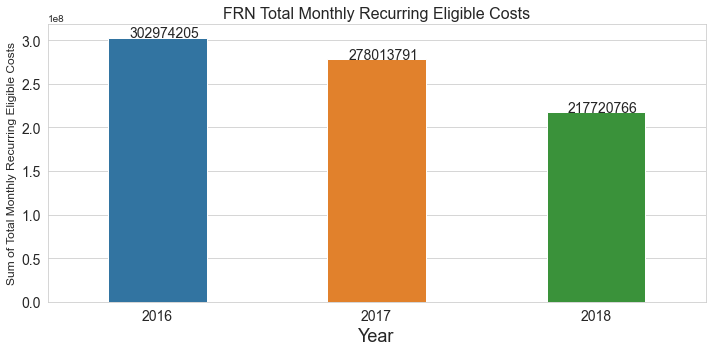

In [139]:
s16 = df_2016['total_monthly_recurring_eligible_costs']
s16=pd.to_numeric(s16)
s16 =s16.sum()

s17 = df_2017['total_monthly_recurring_eligible_costs']
s17=pd.to_numeric(s17)
s17 = s17.sum()

s18 = df_2018['total_monthly_recurring_eligible_costs']
s18=pd.to_numeric(s18)
s18 = s18.sum()
sList1 = [s16,s17,s18]
years = [2016,2017,2018]

fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
title = 'FRN Total Monthly Recurring Eligible Costs'
sns.set_style('whitegrid')


axes = sns.barplot(y=sList1, x=years)
show_values_on_bars(axes, "v", 0.5)
change_width(axes, .45)
axes.set_title(title, fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.set_xlabel('Year', fontsize = 18)
axes.set_ylabel('Sum of Total Monthly Recurring Eligible Costs', fontsize = 12)



plt.tight_layout()    
plt.savefig('test.jpg', dpi =1000)

###  The Second Factor that Contribute to this Trend

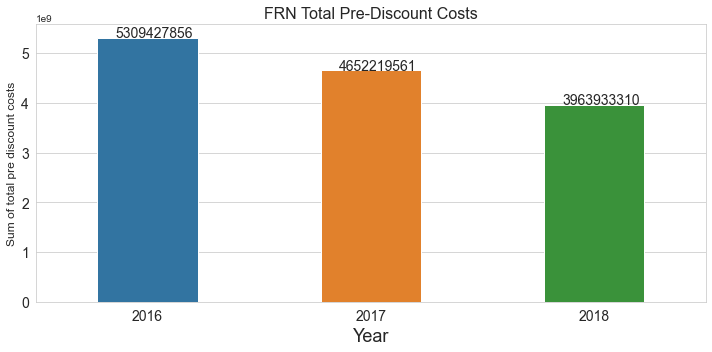

In [140]:
t16 = df_2016['total_pre_discount_costs']
t16=pd.to_numeric(t16)
t16 = t16.sum()

t17 = df_2017['total_pre_discount_costs']
t17=pd.to_numeric(t17)
t17 = t17.sum()

t18 = df_2018['total_pre_discount_costs']
t18=pd.to_numeric(t18)
t18 = t18.sum()

sList2 = [t16,t17,t18]
years = [2016,2017,2018]

fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
title = 'FRN Total Pre-Discount Costs'
sns.set_style('whitegrid')


axes = sns.barplot(y=sList2, x=years)
show_values_on_bars(axes, "v", 0.5)
change_width(axes, .45)
axes.set_title(title, fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.set_xlabel('Year', fontsize = 18)
axes.set_ylabel('Sum of total pre discount costs', fontsize = 12)



plt.tight_layout()    
plt.savefig('test.jpg', dpi =1000)

### The Third Factor that Contribute to this Trend

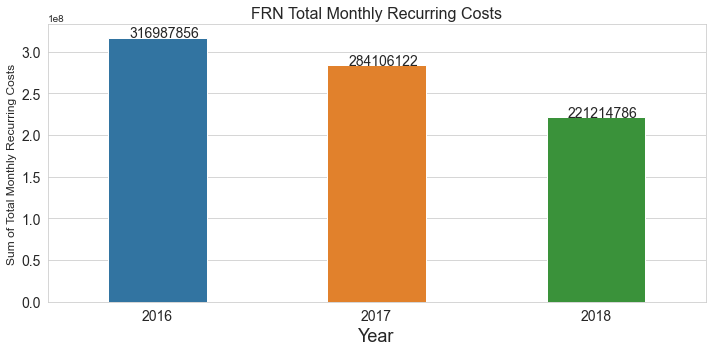

In [141]:
a16 = df_2016['total_monthly_recurring_cost']
a16=pd.to_numeric(a16)
a16 = a16.sum()

a17 = df_2017['total_monthly_recurring_cost']
a17=pd.to_numeric(a17)
a17 = a17.sum()

a18 = df_2018['total_monthly_recurring_cost']
a18=pd.to_numeric(a18)
a18 = a18.sum()

sList3 = [a16,a17,a18]
years = [2016,2017,2018]

fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
title = 'FRN Total Monthly Recurring Costs'
sns.set_style('whitegrid')


axes = sns.barplot(y=sList3, x=years)
show_values_on_bars(axes, "v", 0.5)
change_width(axes, .45)
axes.set_title(title, fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.set_xlabel('Year', fontsize = 18)
axes.set_ylabel('Sum of Total Monthly Recurring Costs', fontsize = 12)



plt.tight_layout()    
plt.savefig('test.jpg', dpi =1000)

### The Forth Factor that Contribute to this Trend

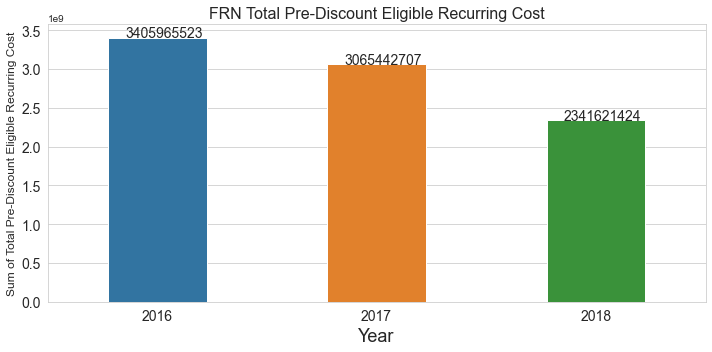

In [142]:
b16 = df_2016['total_pre_discount_eligible_recurring_costs']
b16=pd.to_numeric(b16)
b16 = b16.sum()

b17 = df_2017['total_pre_discount_eligible_recurring_costs']
b17=pd.to_numeric(b17)
b17 = b17.sum()

b18 = df_2018['total_pre_discount_eligible_recurring_costs']
b18=pd.to_numeric(b18)
b18 = b18.sum()

sList4 = [b16,b17,b18]
years = [2016,2017,2018]

fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
title = 'FRN Total Pre-Discount Eligible Recurring Cost'
sns.set_style('whitegrid')


axes = sns.barplot(y=sList4, x=years)
show_values_on_bars(axes, "v", 0.5)
change_width(axes, .45)
axes.set_title(title, fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.set_xlabel('Year', fontsize = 18)
axes.set_ylabel('Sum of Total Pre-Discount Eligible Recurring Cost', fontsize = 12)



plt.tight_layout()    
plt.savefig('test.jpg', dpi =1000)

### Correlation Matrix for Four Factors

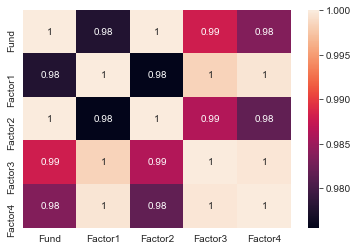

In [143]:
data = {'Fund': s,
        'Factor1': sList1,
        'Factor2': sList2,
        'Factor3': sList3,
        'Factor4': sList4,
        
        }

df = pd.DataFrame(data,columns=['Fund','Factor1','Factor2', 'Factor3', 'Factor4'])

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Looking at other status for more knowledge ( Form Version = Current)

In [144]:
results_df1 = results_dfC[results_dfC.form_version == 'Current']
results_df1 = results_df1[results_df1.is_certified_in_window == 'In Window']

In [160]:
df_2016C = results_df1[results_df1.funding_year == '2016']
df_2017C = results_df1[results_df1.funding_year == '2017']
df_2018C = results_df1[results_df1.funding_year == '2018']

# The whole datset for three years after filtering
framesC = [df_2016C, df_2017C, df_2018C]
dfC = pd.concat(framesC)


### I tried to look at the amonut of Disbursement, but there was noting related to our Trend

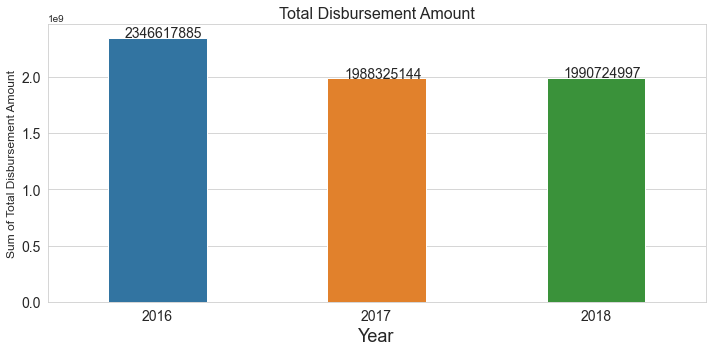

In [161]:
a16c = df_2016C['total_authorized_disbursement']
a16c=pd.to_numeric(a16c)
a16c = a16c.sum()

a17c = df_2017C['total_authorized_disbursement']
a17c=pd.to_numeric(a17c)
a17c = a17c.sum()

a18c = df_2018C['total_authorized_disbursement']
a18c=pd.to_numeric(a18c)
a18c = a18c.sum()

sList1c = [a16c,a17c,a18c]
years = [2016,2017,2018]

fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
title = 'Total Disbursement Amount'
sns.set_style('whitegrid')


axes = sns.barplot(y=sList1c, x=years)
show_values_on_bars(axes, "v", 0.5)
change_width(axes, .45)
axes.set_title(title, fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.set_xlabel('Year', fontsize = 18)
axes.set_ylabel('Sum of Total Disbursement Amount', fontsize = 12)



plt.tight_layout()    
plt.savefig('test.jpg', dpi =1000)

### Look at the trend of number of funding request for Current version

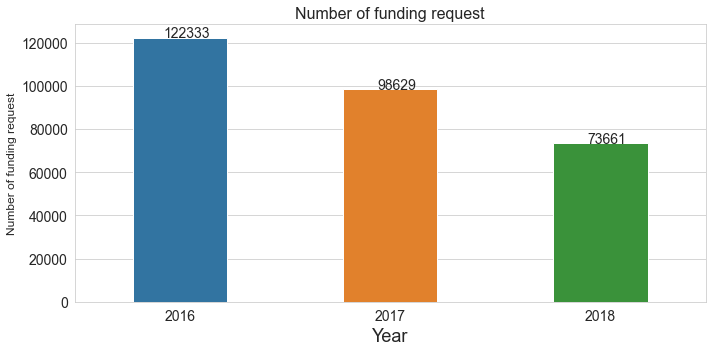

In [162]:
c2016c = df_2016C['funding_request_number'].count()
c2017c= df_2017C['funding_request_number'].count()
c2018c = df_2018C['funding_request_number'].count()

sList2c = [c2016c,c2017c,c2018c]
years = [2016,2017,2018]

fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
title = 'Number of funding request'
sns.set_style('whitegrid')


axes = sns.barplot(y=sList2c, x=years)
show_values_on_bars(axes, "v", 0.5)
change_width(axes, .45)
axes.set_title(title, fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.set_xlabel('Year', fontsize = 18)
axes.set_ylabel('Number of funding request', fontsize = 12)



plt.tight_layout()    
plt.savefig('test.jpg', dpi =1000)

### Look at the trend of funding commitment request for Current version

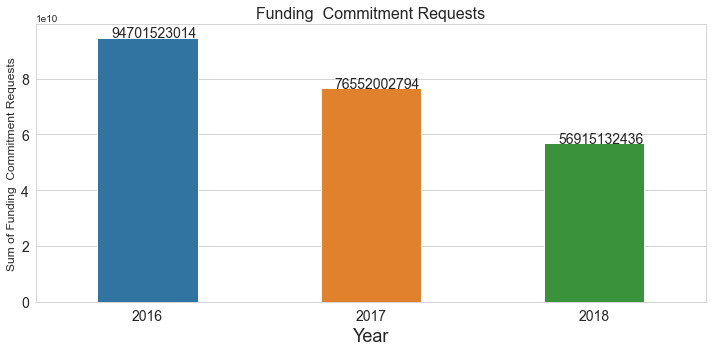

In [163]:
df2016c = pd.DataFrame(data=df_2016C['funding_commitment_request'].index, columns=['funding_commitment_request'])
s2016c = df2016c.sum()
df2017c = pd.DataFrame(data=df_2017C['funding_commitment_request'].index, columns=['funding_commitment_request'])
s2017c = df2017c.sum()
df2018c = pd.DataFrame(data=df_2018C['funding_commitment_request'].index, columns=['funding_commitment_request'])
s2018c = df2018c.sum()
sc = [s2016c[0], s2017c[0], s2018c[0]]


years = [2016,2017,2018]

fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
title = 'Funding  Commitment Requests'
sns.set_style('whitegrid')


axes = sns.barplot(y=sc, x=years)
show_values_on_bars(axes, "v", 0.5)
change_width(axes, .45)
axes.set_title(title, fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.set_xlabel('Year', fontsize = 18)
axes.set_ylabel('Sum of Funding  Commitment Requests', fontsize = 12)



plt.tight_layout()    
plt.savefig('test.jpg', dpi =1000)